## Getting Intraday Currencies CandleStick

#### Importing Dependencies

In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import datetime

#### API login


In [8]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

### Importing and Plotting Function

In [6]:
def getIntradayCandleStickPlot(symbols, date, initTime, endTime, time_frequency):
    initDateTime = f'{date} {initTime}'
    endDateTime = f'{date} {endTime}'
    endDate = pd.date_range(date, periods=2)
    endDate = f'{endDate[1]}'
    endDate = endDate[0:10]
    
    raw_data5 = te.getMarketsIntraday(symbols = symbols, initDate = date, endDate = endDate,  output_type='df')
    
    raw_data5 = raw_data5.sort_values('Date')
    raw_data5['Date'] = pd.to_datetime(raw_data5['Date'])
    raw_data5 = raw_data5.set_index('Date')
    raw_data6 = raw_data5.resample(time_frequency).mean()
    selected_index = (f'{initDateTime}:{endDateTime}')
    data_to_plot = raw_data6.loc[initDateTime : endDateTime]
    
    mpf.plot(data_to_plot, type='candle', style='charles')

#### Data Request
TimeFrequency:
'T' for minutes
'H' for intervals

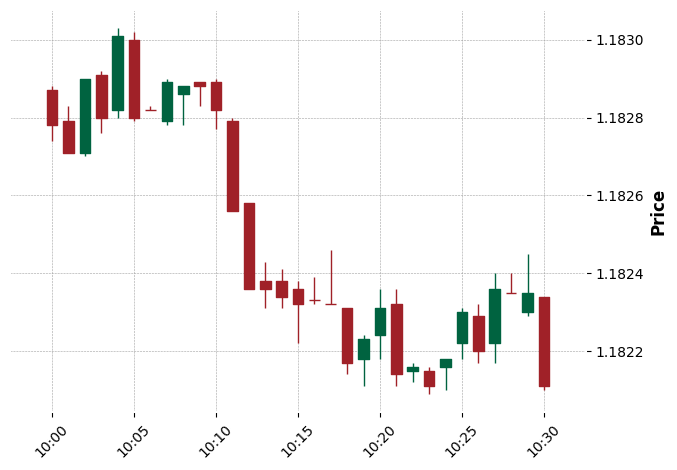

In [7]:

getIntradayCandleStickPlot(symbols = 'EURUSD:CUR', date = '2021-07-07', initTime ='10:00:00', endTime = '10:30:00', time_frequency='T')